# Задача 7. Jupyter

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Загрузка данных

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
len(train), len(test)

(891, 418)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Конкатенация данных

In [5]:
titanic_data = pd.concat([train, test], axis=0, ignore_index=True)

In [75]:
titanic_data['Survived'] = titanic_data['Survived'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')
titanic_data['Sex'] = titanic_data['Sex'].astype('category')
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')

In [76]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [77]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 87.6+ KB


## Анализ таблицы

Визуализируем базовую статистику таблицы

In [9]:
titanic_data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


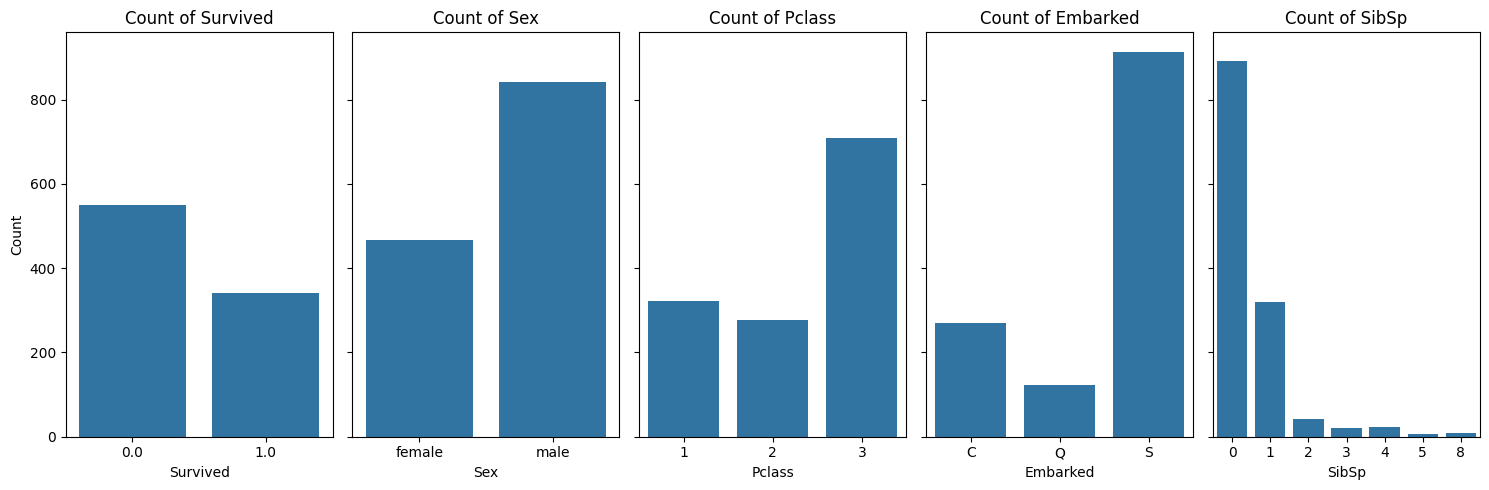

In [78]:
columns = ['Survived', 'Sex', 'Pclass', 'Embarked','SibSp'] 

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)

for i, col in enumerate(columns):
    sns.countplot(data=titanic_data, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

Пасажиров в 3 классе больше

- Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?

In [81]:
age_group = titanic_data.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()
age_group = age_group.sort_values(by='Age', ascending=True)

/tmp/ipykernel_103610/1663176808.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Сгруппировал по полу - классу. Взял колонку возраст, посчитал среднее по группам, сделал reset индексам. потом отсортировал.

In [82]:
age_group

,Pclass,Sex,Age
4,3,female,22.185329
5,3,male,25.962264
2,2,female,27.499223
3,2,male,30.815380
0,1,female,37.037594
1,1,male,41.029272


In [13]:
(age_group['Age'].max() - age_group['Age'].min()).item()

18.843942575810384

Самыми `юными` являются `Женщины из 3 класса`

Самыми `старыми` являются `Мужчины из 1 класса`

Разница `18.843942575810384`


- Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?


In [14]:
survived_k = titanic_data[(titanic_data['Survived'] == 1) & (titanic_data['Name'].str.startswith('K'))]
survived_k_sorted = survived_k.sort_values(by='Fare', ascending=False)
survived_k_sorted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1.0,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
691,692,1.0,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
303,304,1.0,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
300,301,1.0,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
573,574,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q


взял строчки `titanic_data` c выживанием 1 и первым символом имени `K`. Затем отсортировал в обраном порядке по `Fare`

`Меньше` всего заплатила `Kelly, Miss. Mary`

`Больше` всего заплатил `Kimball, Mr. Edwin Nelson Jr`


- Какое максимальное количество родных было с выжившим пассажиром?


In [15]:
max_family = titanic_data[titanic_data['Survived'] == 1]['SibSp'].max()
max_family.item()

4

Взял вхождения с выживанием человека. Взял максимум по этим вхождениям по полю `SibSp`

Ответ: `4`


- Посчитайте среднюю стоимость билета пассажиров, для которых указана каюта (Cabin) и для тех, у кого она не указана, во сколько раз они отличаются?

In [16]:
with_cabin = titanic_data[titanic_data['Cabin'].notna()]['Fare'].mean()
without_cabin = titanic_data[titanic_data['Cabin'].isna()]['Fare'].mean()
fare_ratio = with_cabin / without_cabin
fare_ratio.item()

4.282143526350037

Взял вхождения с и без указанеия каюты. посчитал среднее по полю `Fare` и поделил `Fare` людей с кабины и без

Ответ: `4.282143526350037`

## Визуализация

### Scatter plot

In [ ]:
fig1 = px.scatter(titanic_data, x='Age', y='Fare', color='Pclass', title="Scatter plot: Age vs Fare")
fig1.show()

### Linear Plots

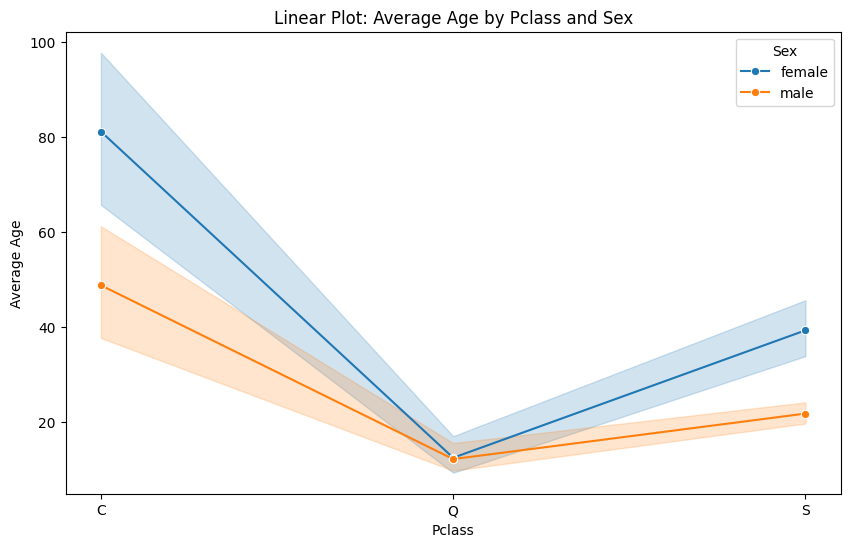

In [ ]:
# Linear plot: Средний возраст по классам и полу
plt.figure(figsize=(10, 6))
sns.lineplot(data=titanic_data, x='Embarked', y='Fare', hue='Sex', marker='o')
plt.title('Linear Plot: Average Age by Pclass and Sex')
plt.xlabel('Embarked')
plt.ylabel('Average Age')
plt.show()

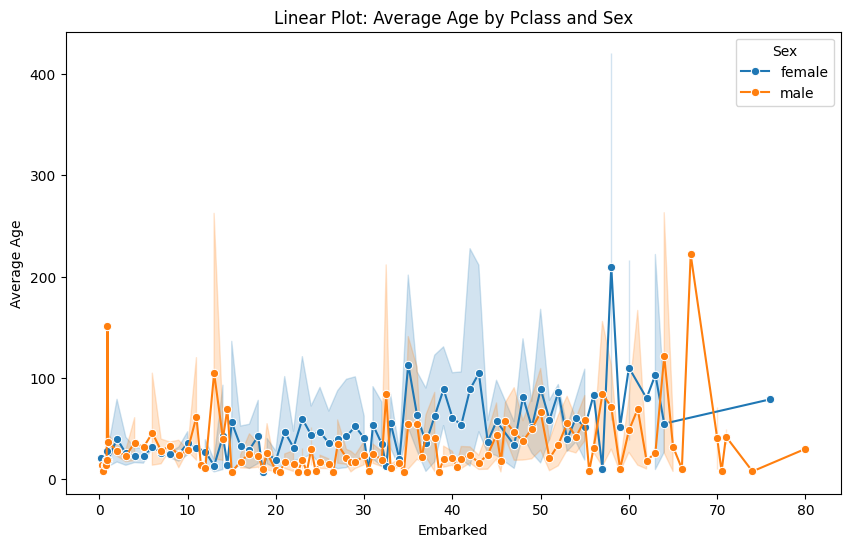

In [73]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=titanic_data, x='Age', y='Fare', hue='Sex', marker='o')
plt.title('Linear Plot: Average Age by Pclass and Sex')
plt.xlabel('Embarked')
plt.ylabel('Average Age')
plt.show()

### Histograms

In [ ]:
fig.show()
fig = px.histogram(titanic_data, x='Age', color='Survived', title="Histogram: Age Distribution")

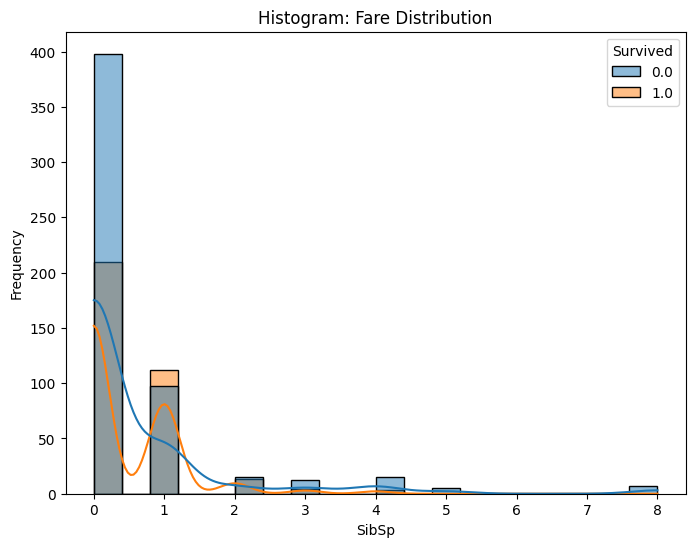

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_data, x='SibSp',hue='Survived', kde=True, bins=20, color='purple')
plt.title('Histogram: Fare Distribution')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()

### Bar Plot

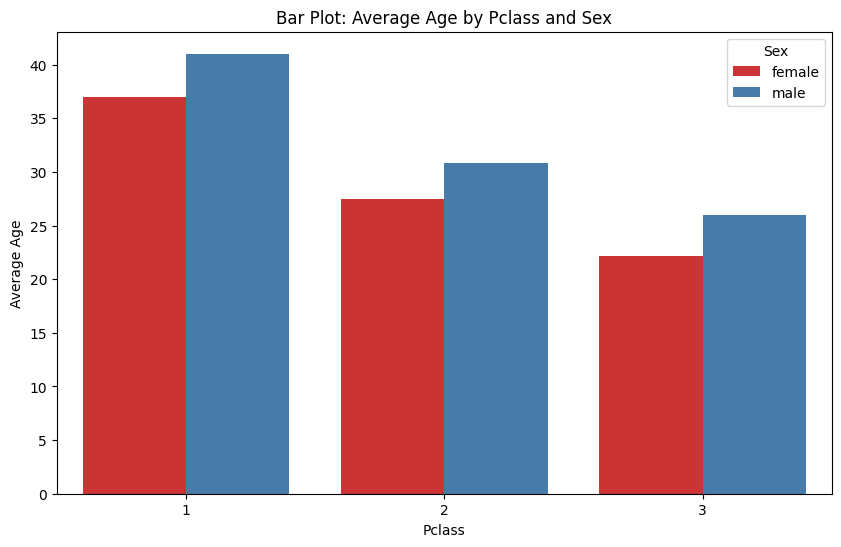

In [49]:
# Столбчатая диаграмма для среднего возраста по классам и полу
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group, x='Pclass', y='Age', hue='Sex', palette='Set1')
plt.title('Bar Plot: Average Age by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Average Age')
plt.show()

### Horizontal bar chart

/tmp/ipykernel_103610/1001082986.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




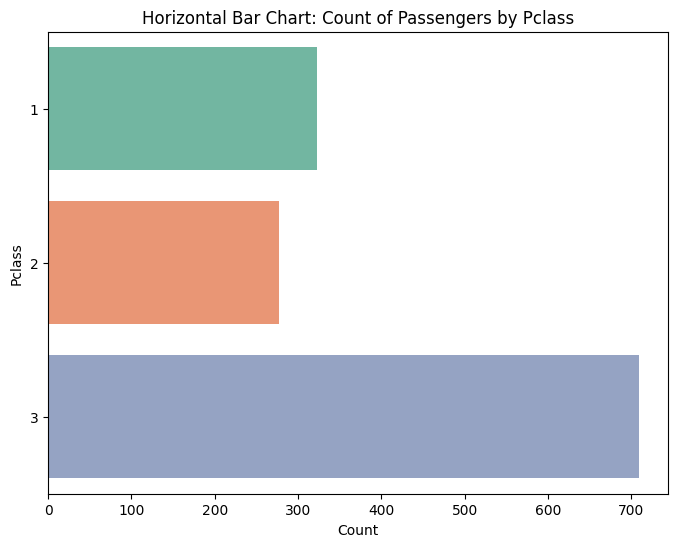

In [42]:
# Horizontal Bar chart: Количество пассажиров по классу
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, y='Pclass', palette='Set2')
plt.title('Horizontal Bar Chart: Count of Passengers by Pclass')
plt.xlabel('Count')
plt.ylabel('Pclass')
plt.show()

### Pie plot

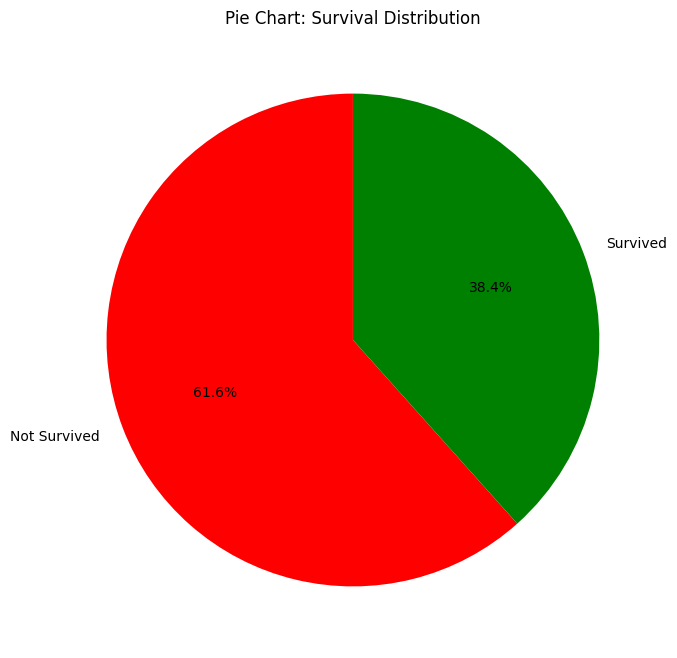

In [43]:
# Pie chart: Процент выживших и невыживших
survived_counts = titanic_data['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Pie Chart: Survival Distribution')
plt.show()

### Boxplot

In [74]:
fig = px.box(titanic_data, x='Pclass', y='Fare', title="Box chart: Fare Distribution by Pclass")
fig.show()

### Sunburst

In [53]:
titanic_data_clean = titanic_data.dropna(subset=['Embarked', 'Sex', 'Survived'])

titanic_data_clean['Survived'] = titanic_data_clean['Survived'].astype('category')
fig = px.sunburst(titanic_data_clean, path=['Embarked', 'Sex', 'Survived'], title='Sunburst Chart: Survival by Embarked and Sex')
fig.show()

/tmp/ipykernel_103610/3537671096.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dmitr/programs/spbu-python-course/pyenv/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/home/dmitr/programs/spbu-python-course/pyenv/lib/python3.12/site-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

### Heatmap

<Axes: title={'center': 'Корреляция числовых значений'}>

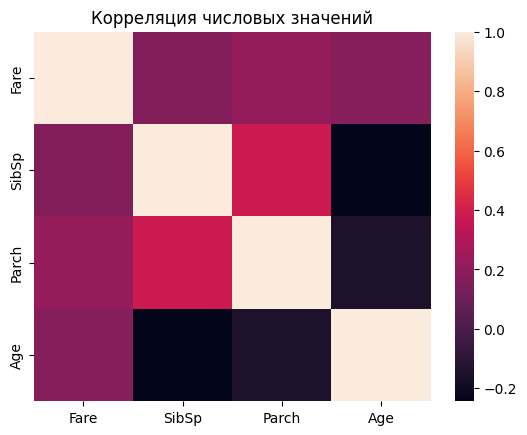

In [29]:
quantative_data = titanic_data[['Fare', 'SibSp', 'Parch', 'Age']]
plt.title("Корреляция числовых значений")
sns.heatmap(quantative_data.corr())

In [47]:
fig = go.Figure(data=[go.Scatter3d(x=titanic_data['Age'], y=titanic_data['Fare'], z=titanic_data['SibSp'], mode='markers')])
fig.show()

### Sankey Diagram

In [67]:
titanic_data_clean = titanic_data.dropna(subset=['Survived'])

titanic_data_clean['Survived'] = titanic_data_clean['Survived'].map({0: 'Died', 1: 'Survived'})
titanic_data_clean['Pclass'] = titanic_data_clean['Pclass'].map({1: '1st Class', 2: '2nd Class', 3: '3rd Class'})
titanic_data_clean['Sex'] = titanic_data_clean['Sex'].map({'male': 'Male', 'female': 'Female'})

# Create a flow for the Sankey plot
node_labels = ['1st Class', '2nd Class', '3rd Class', 'Male', 'Female', 'Survived', 'Died']
# The indices of the labels for the source and target nodes
sources = [0, 1, 2, 3, 4, 3, 4]
targets = [5, 5, 5, 6, 6, 6, 6]
values = [titanic_data_clean[(titanic_data_clean['Pclass'] == '1st Class') & (titanic_data_clean['Survived'] == 'Survived')].shape[0],
    titanic_data_clean[(titanic_data_clean['Pclass'] == '2nd Class') & (titanic_data_clean['Survived'] == 'Survived')].shape[0],
    titanic_data_clean[(titanic_data_clean['Pclass'] == '3rd Class') & (titanic_data_clean['Survived'] == 'Survived')].shape[0],
    titanic_data_clean[(titanic_data_clean['Sex'] == 'Male') & (titanic_data_clean['Survived'] == 'Survived')].shape[0],
    titanic_data_clean[(titanic_data_clean['Sex'] == 'Female') & (titanic_data_clean['Survived'] == 'Survived')].shape[0],
    titanic_data_clean[(titanic_data_clean['Sex'] == 'Male') & (titanic_data_clean['Survived'] == 'Died')].shape[0],
    titanic_data_clean[(titanic_data_clean['Sex'] == 'Female') & (titanic_data_clean['Survived'] == 'Died')].shape[0]]
# Create Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(title_text="Titanic Passenger Distribution", font_size=10)
fig.show()

/tmp/ipykernel_103610/2139686128.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_103610/2139686128.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_103610/2139686128.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Итого:
1. 6 графиков интерактивны
2. Среди представленных графиков есть все обязательные
3. 1 график сделан 3D
4. 18 графиков было сделано